## Introduction to the Interstellar Medium
### Jonathan Williams

### Figure 7.7: map of integrated 12CO J=1-0 emission of the Rosette Giant Molecular Cloud

#### observations taken with the Five College Radio Astronomy Observatory
#### and published by Heyer, Williams, & Brunt 2006 (https://ui.adsabs.harvard.edu/abs/2006ApJ...643..956H)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from astropy.io import fits
from astropy.visualization import (ImageNormalize, SqrtStretch, LogStretch, AsinhStretch)
%matplotlib inline

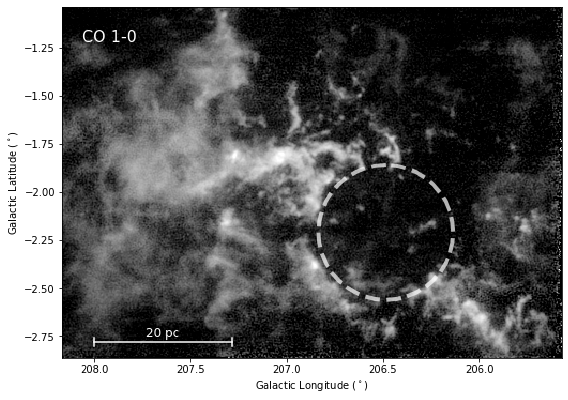

In [5]:
fig = plt.figure(figsize=(8,6))

hdu = fits.open('rosette_CO_FCRAO.fits')
ax = fig.add_subplot(111)
im = hdu[0].data
hd = hdu[0].header
#print(hd)
hdu.close()

nx = hd['naxis1']
x0 = hd['crval1']
dx = hd['cdelt1']
i0 = hd['crpix1']
nx = hd['naxis2']
y0 = hd['crval2']
dy = hd['cdelt2']
j0 = hd['crpix2']

imin, imax = 50, 517
jmin, jmax = 2, 330
xmin, xmax = x0+(imax-i0)*dx, x0+(imin-i0)*dx
ymin, ymax = y0+(jmin-j0)*dy, y0+(jmax-j0)*dy
extent = [xmax, xmin, ymin, ymax]
#print(extent)
im_crop = im[jmin:jmax, imin:imax]
im_max = im_crop.max()
#print(im_crop.min(),im_crop.max())

norm = ImageNormalize(im_crop, vmin=0, vmax=0.2*im_max, stretch=AsinhStretch(0.1))
ax.imshow(im_crop, cmap='gray', origin='lower', norm=norm, extent=extent) 

# some annotation
plt.plot((208.0, 207.284), (-2.78, -2.78), color='white', lw=1.5)
plt.plot((208.0, 208.0), (-2.8, -2.76), color='white', lw=1.5)
plt.plot((207.284, 207.284), (-2.8, -2.76), color='white', lw=1.5)
ax.text(207.642, -2.75, "20 pc", {'color': 'w', 'fontsize': 12}, ha='center')
rHII = 0.35
theta = np.arange(41)*np.pi/20
xHII = 206.485 + rHII*np.sin(theta)
yHII = -2.21 + rHII*np.cos(theta)
plt.plot(xHII, yHII, color='white', linestyle='dashed', linewidth=4, alpha=0.7)
ax.text(0.04,0.9,r'CO 1-0', {'color': 'w', 'fontsize': 16}, transform=ax.transAxes)

ax.xaxis.set_major_formatter(FormatStrFormatter('%5.1f'))
ax.set_xlim(xmax, xmin)
ax.set_ylim(ymin, ymax)
ax.set_xlabel(r'Galactic Longitude ($^\circ$)')
ax.set_ylabel(r'Galactic Latitude ($^\circ$)')

plt.tight_layout()
plt.savefig('rosette_CO_image.pdf')